<div style="border:solid Chocolate 2px; padding: 40px">

<b>Елена, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку! 

## **Введение**

Целью проекта является выявление закономерностей определяющих успешность игры на основе данных по выборке об играх на различных платформах с информацией об их годе выпуска, оценках пользователей, продажах.

<font color='blue'> Исходны данные:
Нам предоставлена таблица с данными о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. Данные предоставлены в формате csv.

План работы:
    
- Выполним подготовку данных: обработаем наименования столбцов, выполним поиск дубликатов, заполним пропуски, изменим тип данных при необходимости;
- Добавим столбец с суммарными продажами;
- Проведем исследовательский анализ данных: посмотрим, сколько игр выпускалось в разные годы; посмотрите, как менялись продажи по платформам; определим актуальный период и посмотрим какие платформы лидируют по продажам; построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам; посмотрим, как влияют на продажи отзывы пользователей и критиков; посмотрим на общее распределение игр по жанрам; 
- Составим портрет пользователя каждого региона;
- Проверим гипотезы: самые популярные платформы (топ-5). Опишите различия в долях продаж; самые популярные жанры (топ-5);
- Напишем общие выводы.
    </font>


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b>Хорошо, а давай напишем план работы и опишем данные? 

<div class="alert alert-info">
<b>Написала план работы и описала данные</b> 
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Было бы круто добавить описание данных из ТЗ 

## **Подготовка данных**

Загрузим необходимые библиотеки (для презентативности исследования в ходе выполнения проекта будем добавлять в начало):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats as st

Откроем файл с данными:

In [2]:
data = pd.read_csv('/datasets/games.csv') 

Просмотрим файл с данными. Выведем первые 20 строк:

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получим информацию о файле:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<font color='blue'> **Выводы по обзору данных:** В таблице видим наименования с использованием разного буквенного регистра, у столбца с годом выпуска тип данных - float, у столбца с оценками пользователей тип данных - object. В данных присутствуют пропущенные значения в столбцах с наименованием, годом выпуска, оценками пользователей и рейтингом. Необходимо будет обработать наименования столбцов и типы данных, далее выполним работу с пропусками. </font>


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Сделаем вывод по обзору данных? Неправильные типы данных? Пропуски? Дубликаты?

<div class="alert alert-info">
<b>Сделала промежуточный вывод</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Окей) 

**Обработка наименований столбцов**

В наименованиях столбцов встречаем наименования с использованием разного буквенного регистра. Приведем все наименования к нижнему регистру и выведем первые 5 строк на экран:

In [5]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Оптимальнее такой код
        
        games.columns = games.columns.str.lower()

<div class="alert alert-info">
<b>Учла, спасибо</b> 
</div>

**Проверим наличие дубликатов:**

<font color='blue'> Поиск явных дубликатов:</font>



In [6]:
data.duplicated().sum()

0

<font color='blue'> Для проверки неявных дубликатов возьмем за основу столбцы с уникальными значениями наименований игр, платформ, жанров, рейтинга.

Поиск неявных дубликатов:</font>

In [7]:
print(data['name'].unique().tolist())
#print(sorted(data['name'].unique().tolist())


['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Duck Hunt', 'Nintendogs', 'Mario Kart DS', 'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Kinect Adventures!', 'Wii Fit Plus', 'Grand Theft Auto V', 'Grand Theft Auto: San Andreas', 'Super Mario World', 'Brain Age: Train Your Brain in Minutes a Day', 'Pokemon Diamond/Pokemon Pearl', 'Super Mario Land', 'Super Mario Bros. 3', 'Grand Theft Auto: Vice City', 'Pokemon Ruby/Pokemon Sapphire', 'Brain Age 2: More Training in Minutes a Day', 'Pokemon Black/Pokemon White', 'Gran Turismo 3: A-Spec', 'Call of Duty: Modern Warfare 3', 'Pokémon Yellow: Special Pikachu Edition', 'Call of Duty: Black Ops 3', 'Call of Duty: Black Ops', 'Pokemon X/Pokemon Y', 'Call of Duty: Black Ops II', 'Call of Duty: Modern Warfare 2', 'Grand Theft Auto III', 'Super Smash Bros. Brawl', 'Mario Kart 7', 'Animal Crossing: Wild World', 'Halo 3', '

<font color='blue'> При анализе уникальных значений не обнаружены опечатки, разный регистр. Посчитаем количество уникальных значений: </font>

In [8]:
n = len(pd.unique(data['name']))
print(n)

11560


<font color='blue'> Видим, что таких значений больше, чем строк в DataFrame. У игр с одинаковым названием могут быть разные платформы, выведем на экран игры с одинаковым названием одинаковой платформы, с количеством уникальных значений больше 1. </font>

In [9]:
data.groupby('platform')['name'].value_counts().loc[lambda x : x > 1].to_frame()

name
platform name                             
PC       Need for Speed: Most Wanted     2
PS3      Madden NFL 13                   2
         Sonic the Hedgehog              2
X360     Need for Speed: Most Wanted     2

<font color='blue'> Выведем эти строки на экран. </font>

In [10]:
data[(data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'PC')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T


In [11]:
data[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [12]:
data[(data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [13]:
data[(data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'X360')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


<font color='blue'> Проанализируем игру Madden NFL 13 от PS3. Год выпуска одинаковый, жанр и оценки тоже, но у строки 16230 практически нулевые продажи. Считаю, что речь идет об одной и той же игре и строку 16230 можно удалить. Насчет игры Sonic the Hedgehog мы не можем утверждать, что это одинаковые игры, т.к. не указан год выпуска. </font>

In [14]:
data.drop(labels = [16230],axis = 0, inplace = True)
#Проверим результат
data[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E


In [15]:
print(data['platform'].unique().tolist())

['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']


In [16]:
print(data['genre'].unique().tolist())

['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy', nan]


In [17]:
print(data['rating'].unique().tolist())

['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']


<font color='blue'> **Промежуточные выводы по поиску дубликатов:** при анализе обнаружены неявные дубликаты в столбце с наименованием с игрой Madden NFL 13 от PS3, строка удалена. В остальных столбцах дубликаты не обнаружены </font>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Проверим явные дубликаты? И неявные по остальным столбцам с уникальными значениями? 

<div class="alert alert-info">
<b>Проверила</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично) 

**Обработка пропущенных значений**

Посчитаем количество пропусков по столбцам:

In [18]:
data.isnull().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b>Тут было бы круто отсортировать)

<div class="alert alert-info">
<b>Отсортировала</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Лайк

Строк с пропущенными наименованиями игр всего 2, пропущенные значения нельзя заменить по аналогии с другими, данные строки не помогут нам в дальнейшем анализе, их можно удалить:

In [19]:
data.dropna(subset=['name'], inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо) 

Выведем строки с пропусками года выпуска на экран:

In [20]:
data[data['year_of_release'].isna()].head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Всего таких значений 269, что составляет 269/16714 * 100% = 1,6 процента от общего количества. Мы видим в таблице одинаковые наименования игр. Проверим, одинаковый ли год выпуска у игр с одинаковым наименованием. Выведем несколько строк с одинаковыми наименованиями:

In [21]:
data[data['name'] == 'Rock Band']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


In [22]:
data[data['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [23]:
data[data['name'] == 'Hitman 2: Silent Assassin']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
483,Hitman 2: Silent Assassin,PS2,2002.0,Action,1.36,1.15,0.04,0.41,85.0,7.8,M
1699,Hitman 2: Silent Assassin,XB,NaN,Action,0.76,0.38,0.00,0.05,84.0,8,M
9493,Hitman 2: Silent Assassin,GC,2003.0,Action,0.10,0.03,0.00,0.00,83.0,5.5,M


Мы видим в таблице одинаковые наименования игр с одинаковым годом, но для разных платформ. Если есть не одна запись, то это либо разные игры с одинаковым названием, либо одна из них ремейк и годы выпуска у них разные. Так как таких значений незначительное множество, удалим их:

In [24]:
data.dropna(subset=['year_of_release'], inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Согласен с тобой

В столбцах с рейтингом встречается абревиатура tbd (To Be Determined - Ещё не определён), это значит, что данных для заполнения рейтинга не достаточно, и можно принять данные значения за нулевые (NaN).

In [25]:
data.loc[data.user_score =='tbd', 'user_score'] = np.nan

Проверим, все ли значения заполнены.

In [26]:
len(data[data['user_score'] == 'tbd'])

0

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Хорошо) 

Пропуски в столбцах critic_score, user_score, rating заменять не следует, так как оценки и рейтинг персонален для каждой игры, значения некорректно заменять нулевыми, средними или аналогичными значениями. Проверим количество пропусков:

In [27]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Окей) 

**Преобразование типов данных**

Данные с годом выпуска переведем в целочисленный тип (год это, как правило, целое число):

In [28]:
data['year_of_release'] = data['year_of_release'].astype('int')

Данные user_score переведем из типа object в тип float для удобства работы в дальнейшем:

In [29]:
data['user_score'] = data['user_score'].astype('float')

Столбец с оценкой критиков не буду переводить в целочисленный тип данных, т.к. при оценке корреляции в будущем возникает ошибка, связанная с операциями над числами float и int.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошечно) 

In [30]:
#data['critic_score'] = data['critic_score'].astype('Int64')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b>  Есть метод, который позволяет привести тип данных даже несмотря на налчиие пропусков в столбце. Даже несмотря на налчиие аномалий в столбце, таких как "tdb". Вот он:
        
        to_numeric(errors = 'coerce')

<div class="alert alert-info">
<b>Cпасибо, в будущем буду использовать</b> 
</div>

Проверим информацию дата фрейма:

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Сбросим индексацию:

In [32]:
data.reset_index(drop=True,inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Молодец, что не забыла) 

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**

In [33]:
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div class="alert alert-success">
<h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Столбец добавлен верно, но для подсчета суммарных продаж рекомендую использовать следующую конструкцию 
    
    
    games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Выведем таблицу на экран для проверки:

In [34]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Выводы по подготовке данных:**
<font color='blue'> 
- наименования столбцов приведены к нижнему регистру;
- явные дубликаты не обнаружены, неявные дубликаты обработаны;
- проведен анализ пропусков в дата фрейм. Удалены пропуски там, где это необходимо (в столбце name в связи с маленьким числом пропусков и отсутствием значимости и в столбце year_of_release в связи с маленьким числом пропусков и нвозможностью замены);
- аббревиатура "tbd" заменена на NaN, т.к. это значит, что данных для заполнения рейтинга не достаточно;
- заменены типы данных в столбцах с годом и оценками; 
- добавлен столбец с суммарными продажами.
</font>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Хорошо, но следует доработать несколько замечаний

<div class="alert alert-info">
<b>Доработала</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично) 

## **Исследовательский анализ данных**

**Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды**

In [35]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Для наглядности построим гистограмму:

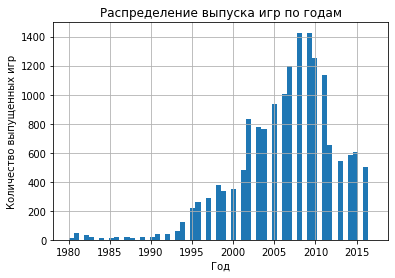

In [36]:
data.hist('year_of_release', bins=60, range=(1980,2017))
plt.title('Распределение выпуска игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр');

**Вывод:**
- к 2008 году виден рост выпуска игр и резкий спад к 2016 году;
- изучив данные в интернете про мировой рынок игр, нашла информацию, что в 2008 году в США произошел крупный экономический кризис, который повлиял на игровую индустрию, в связи с чем многие игровые фирмы обанкротились, а акции некоторых значительно упали в цене;
- судя по графику, данные за период до 1995 года не так важны, потому что они слишком малы относительно данных за период 1995-2016. Скорее всего в период до 1995 года индустрия игр только зарождалась и была не так популярна.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Отлично, и график, и подписи осей и вывод! 

**Посмотрим, как менялись продажи по платформам и определим за какой характерный срок появляются новые и исчезают старые платформы**

In [37]:
data.groupby('platform').sum()['total_sales']

platform
2600      86.48
3DO        0.10
3DS      257.81
DC        15.95
DS       802.78
GB       254.43
GBA      312.88
GC       196.73
GEN       28.35
GG         0.04
N64      218.01
NES      251.05
NG         1.44
PC       255.76
PCFX       0.03
PS       727.58
PS2     1233.56
PS3      931.33
PS4      314.14
PSP      289.53
PSV       53.81
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      891.18
WiiU      82.19
X360     961.24
XB       251.57
XOne     159.32
Name: total_sales, dtype: float64

Для наглядности построим столбчату гистограмму и выявим платформы с наибольшими суммарными продажами.

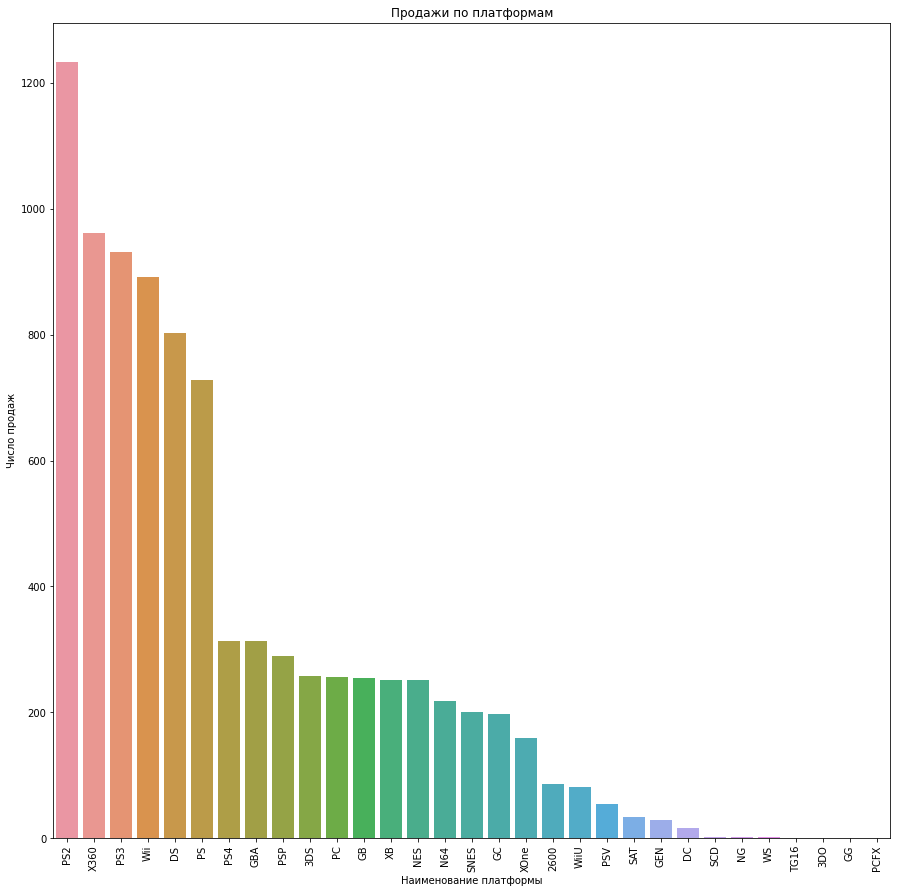

In [38]:
platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15,15))
seaborn.barplot(x=platforms.index,y=platforms['total_sales'])
plt.xticks(rotation = 90)
plt.title('Продажи по платформам')
plt.xlabel('Наименование платформы')
plt.ylabel('Число продаж');

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, хорошо) Топ платформ определен верно

Согласно гистограмме наибольшие суммарные продажи имеют следующие платформы:

In [39]:
print(list(platforms.index[:6]))

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


Оставим в сводной таблице только популярные платформы:

In [40]:
platforms.drop(platforms.index[6:31], axis = 0, inplace=True)
print(platforms)

          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.33
Wii            891.18
DS             802.78
PS             727.58


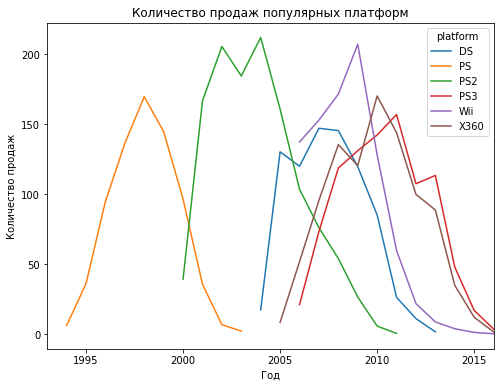

In [41]:
popular_platforms = data[data.platform.isin(platforms.index)]
popular_platforms = popular_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
popular_platforms.plot(figsize=(8,6), xlim=(1993, 2016))
plt.title('Количество продаж популярных платформ')
plt.xlabel('Год')
plt.ylabel('Количество продаж');

**Промежуточные выводы:** 
- По всем платформам видны резкие скачки на начальных этапах продаж, затем резкое падение после выхода новых платформ;
- Популярные игровые платформы в среднем существуют по 10 лет. Пик популярности наступает примерно через 5 лет после выхода приставки.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Согласен, за 10 лет продажи на любой платформе падают до 0

**Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно.**

<strike>Актуальный период можно взять с 2010 года, т.к. на графиках прослеживаются несколько пиков продаж у нескольких популярных платформ за этот период. Создадим новую таблицу.</strike>

<font color='blue'> Так как данные за 2016 год неполные, примем за актуальный период данные за последние три года 2014, 2015, 2016 </font>

In [42]:
period_2014 = data[data['year_of_release'] > 2013]

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Слишком большеват актуальный период. Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит

<div class="alert alert-info">
<b>Взяла за последние 3 года с 2014 года</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Поддерживаю

Посмотрим информацию о новой таблице:

In [43]:
period_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


Выведем первые 10 строк новой таблицы на экран:

In [44]:
period_2014.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Сбросим индексацию в таблице с данными за актуальный период:

In [45]:
period_2014.reset_index(drop=True,inplace=True)

**Определим, какие платформы лидируют по продажам**

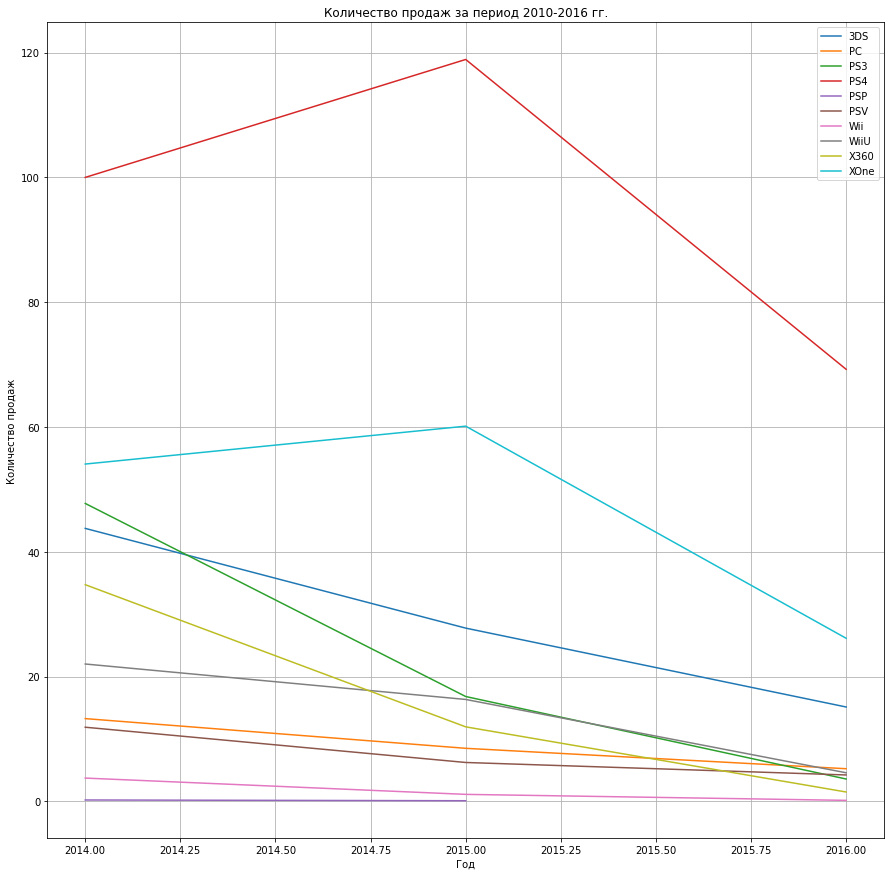

In [46]:
period_2014.pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc='sum').T.plot(grid=True, figsize=(15,15))
plt.title('Количество продаж за период 2010-2016 гг.')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.legend()
plt.show()



**Промежуточные выводы:**

<font color='blue'> 
    
- К 2015 году видим рост продаж у двух платформ: PS4, XOne.
- Наиболее высокие продажи у PS4.
- Продажи на платформах Wii, PSV, WiiU, X360 в 2016 г. снизились до минимума. Данные платформы уже не прибыльны.

К потенциально прибыльным платформам можно отнести: PS4, XOne. </font>
График показывает отрицательную тенденцию на рынке.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Перепроверим по верному актулаьному периоду и продажи с 2015 года падают, потому что данные за 2016 год неполные) 

<div class="alert alert-info">
<b>Перепроверила</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Хорошо
    

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

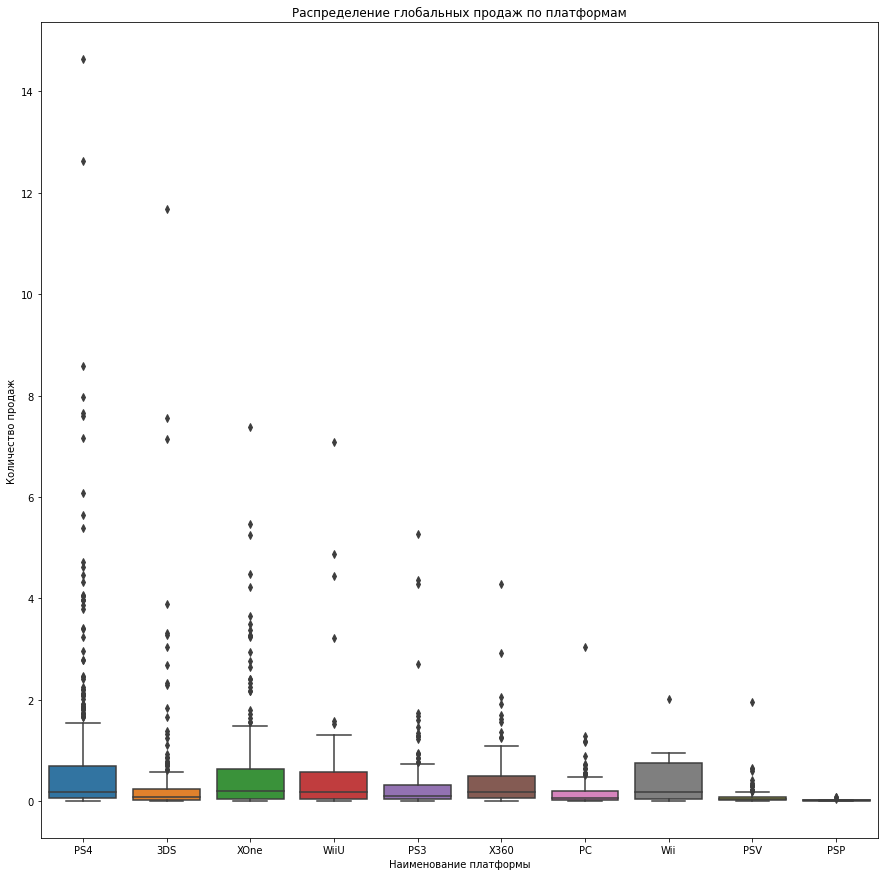

In [47]:
plt.figure(figsize=(15,15))
seaborn.boxplot(x='platform', y='total_sales', data=period_2014)
plt.title('Распределение глобальных продаж по платформам')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество продаж');

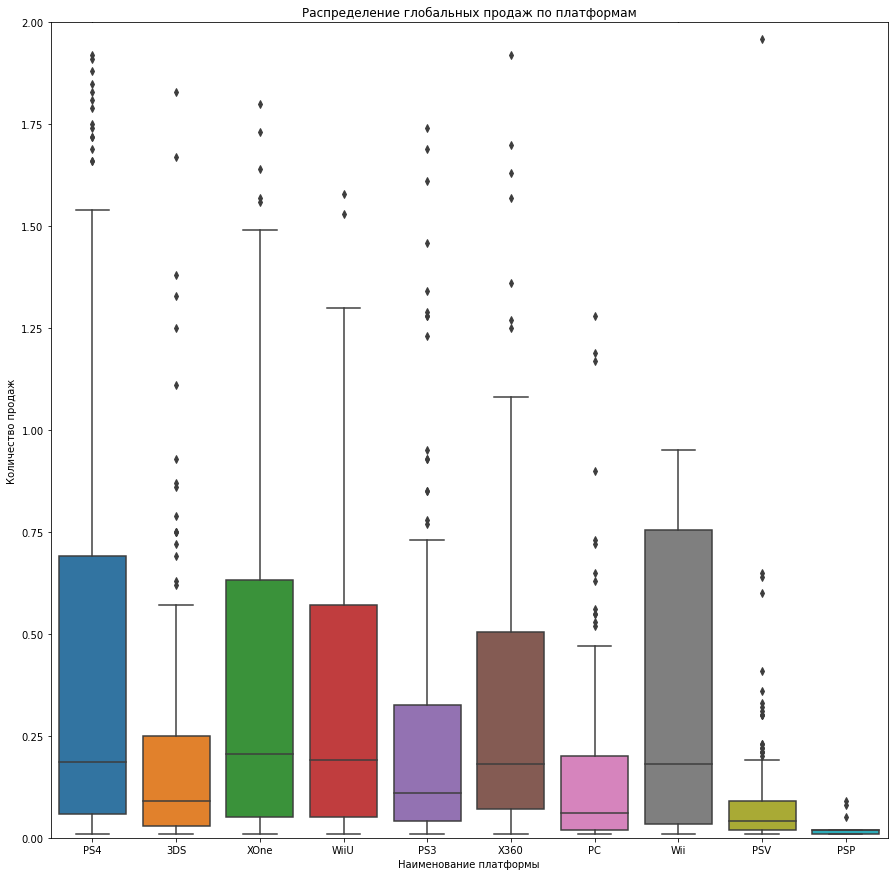

In [48]:
plt.figure(figsize=(15,15))
seaborn.boxplot(x='platform', y='total_sales', data=period_2014)
plt.ylim([0, 2])
plt.title('Распределение глобальных продаж по платформам')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество продаж');

По графику видна, прибыль всех платформ. Наибольшее число продаж у Wii. PS4 ,X360, XOne относительно молодые платформы, за счет этого имеют большое количество продаж. Наименьшее количество продаж у платформы PSP. Исходя из графиков видно, что медиана протекает у всех по разному

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов. Этого можно добиться, например, задав параметр ylim

<div class="alert alert-info">
<b>Дополнительный график сделала</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Топ

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

Возьмем за основу платформу с наибольшими продажами за период - X360. 

Предварительно определим диапазоны корреляции:
- corr < +-0.3 - слабая
- +-0.3 < corr < +-0.5 - умеренная
- +-0.5 < corr < +-0.7 - средняя
- +-0.7 < corr < +-1.0 - сильная
- corr = +-1.0 - полная
Посчитаем корреляцию между оценками пользователей и продажами:

In [49]:
x360 = period_2014[period_2014['platform'] == 'X360']
x360['user_score'].corr(x360['total_sales'])

-0.138444570945665

Построим диаграмму рассеяния по оценкам пользователей:

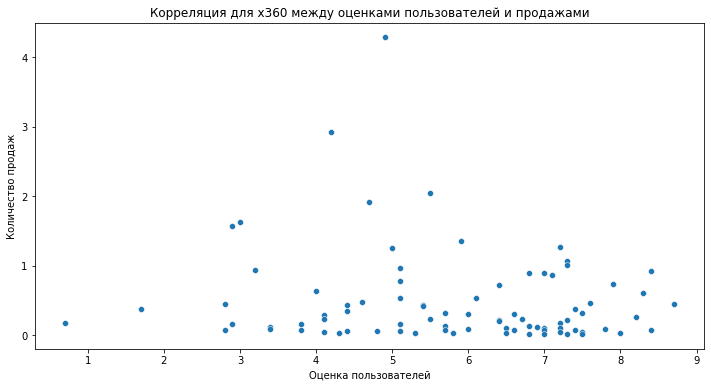

In [50]:
plt.figure(figsize=(12,6))
seaborn.scatterplot(x='user_score', y='total_sales', data=x360)
plt.title('Корреляция для x360 между оценками пользователей и продажами')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж');

Посчитаем корреляцию между оценками критиков и продажами:

In [51]:
x360['critic_score'].corr(x360['total_sales'])

0.5257228356581523

Построим диаграмму рассеяния по оценкам критиков:

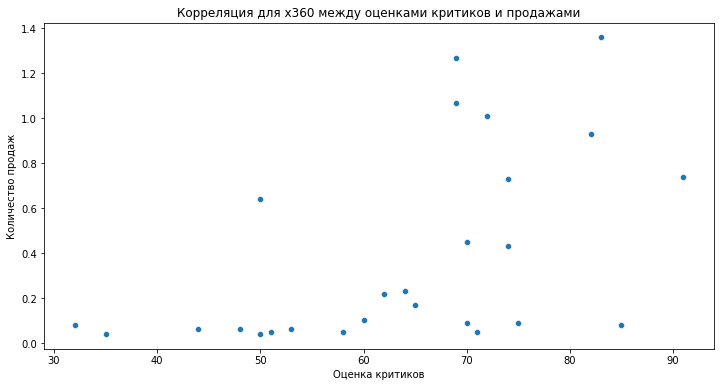

In [52]:
plt.figure(figsize=(12,6))
seaborn.scatterplot(x='critic_score', y='total_sales', data=x360)
plt.title('Корреляция для x360 между оценками критиков и продажами')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж');

По полученным данным видно, что для X360 корреляция между оценками пользователей и продажами - слабая, между оценками критиков и продажами - средняя.

**Соотнесем выводы с продажами игр на других платформах.**

Возьмем за основу платформы с наибольшим количеством продаж: PS4, XOne, WiiU.
Посчитаем корреляцию между оценками пользователей и продажами:

In [53]:
ps4 = period_2014[period_2014['platform'] == 'PS4']
xone = period_2014[period_2014['platform'] == 'XOne']
wiiu = period_2014[period_2014['platform'] == 'WiiU']

for i in (ps4, xone, wiiu):
    i.reset_index(drop=True,inplace=True)
    print('Корреляция для {}:'.format(i.loc[1, 'platform']) , i['user_score'].corr(i['total_sales']))

Корреляция для PS4: -0.040131589472697356
Корреляция для XOne: -0.0703839280647581
Корреляция для WiiU: 0.40792645792170773


Посчитаем корреляцию между оценками критиков и продажами:

In [54]:
ps4 = period_2014[period_2014['platform'] == 'PS4']
xone = period_2014[period_2014['platform'] == 'XOne']
wiiu = period_2014[period_2014['platform'] == 'WiiU']

for i in (ps4, xone, wiiu):
    i.reset_index(drop=True,inplace=True)
    print('Корреляция для {}'.format(i.loc[1, 'platform']) , i['critic_score'].corr(i['total_sales']))

Корреляция для PS4 0.40266141068104083
Корреляция для XOne 0.42867694370333226
Корреляция для WiiU 0.370201412480884


Построим диаграммы рассеяния по оценкам пользователей:

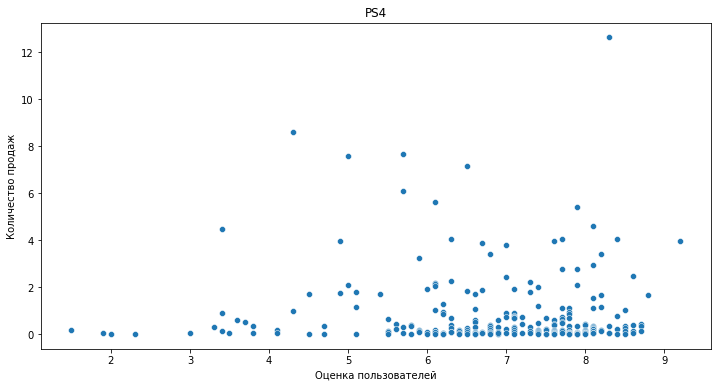

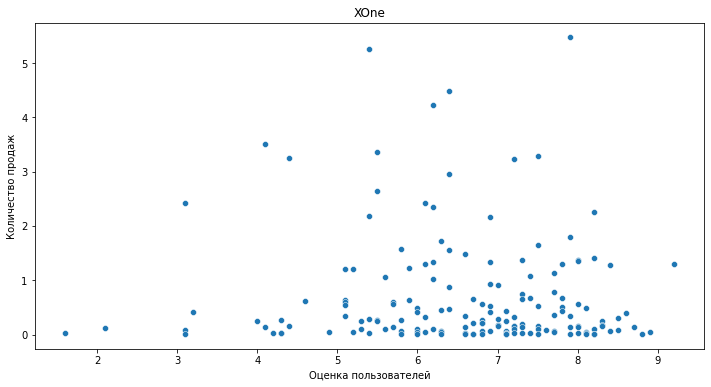

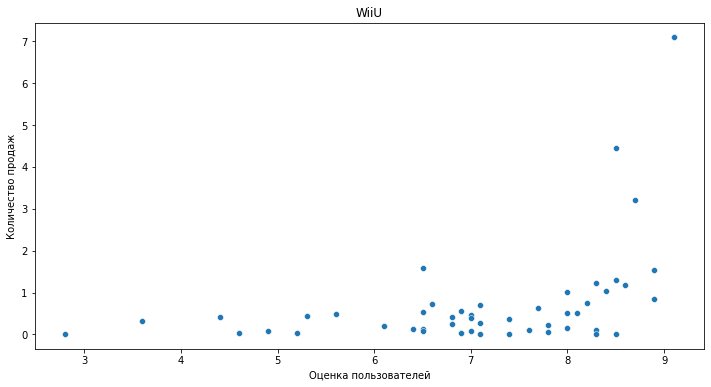

In [55]:
for i in (ps4, xone, wiiu):
    plt.figure(figsize=(12,6))
    seaborn.scatterplot(x='user_score', y='total_sales', data=i)
    plt.title(i.loc[1, 'platform'])
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Количество продаж');

Построим диаграммы рассеяния по оценкам критиков:

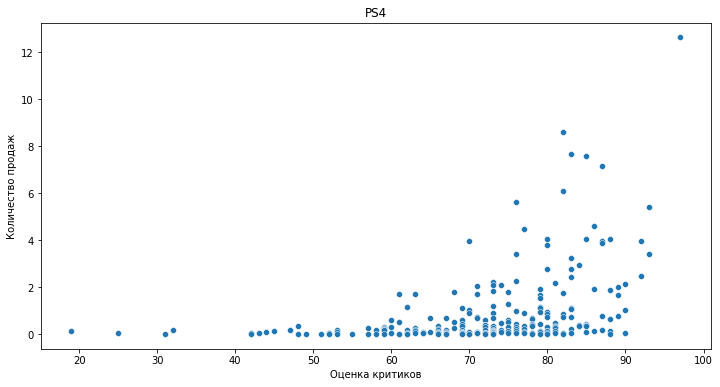

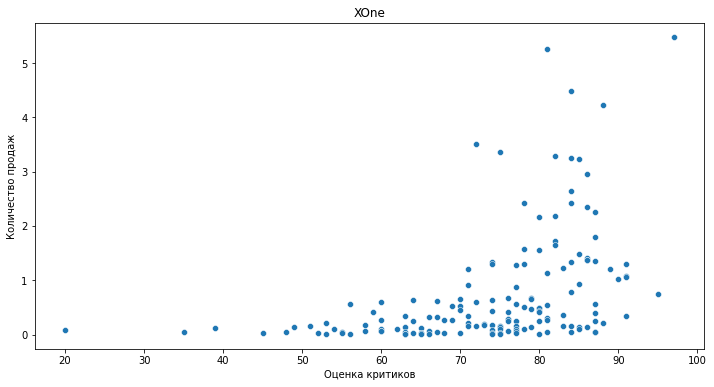

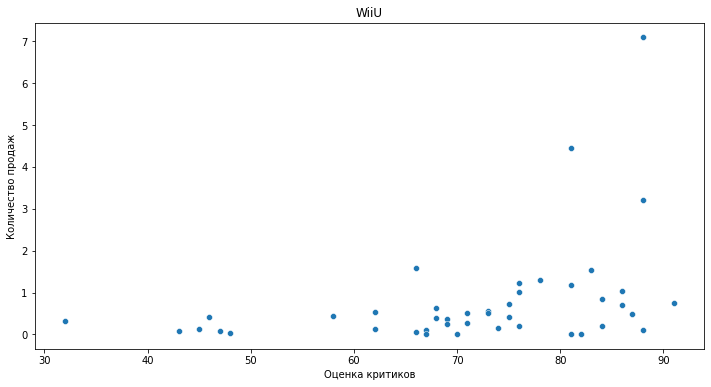

In [56]:
for i in (ps4, xone, wiiu):
    plt.figure(figsize=(12,6))
    seaborn.scatterplot(x='critic_score', y='total_sales', data=i)
    plt.title(i.loc[1, 'platform'])
    plt.xlabel('Оценка критиков')
    plt.ylabel('Количество продаж');

**Выводы:**

По полученным данным видно, что для:
- PS4 корреляция между оценками пользователей и продажами - слабая, между оценками критиков и продажами - умеренная;
- XOne корреляция между оценками пользователей и продажами - слабая, между оценками критиков и продажами - умеренная;
- WiiU корреляция между оценками пользователей и продажами - умеренная, между оценками критиков и продажами - умеренная.

Оценки критиков имеют влияние на продажи. Чем больше рценка критиков, тем больше продажи. Оценки пользователей слабо влияют на продажи.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> По зависимотсям все хорошо, но перепроверим по актулаьному периоду) 

**Посмотрим на общее распределение игр по жанрам**

In [57]:
genre_table = pd.pivot_table(period_2014, index='genre', values='total_sales', aggfunc={'total_sales': ['sum', 'mean', 'median']})
display(genre_table.sort_values('mean', ascending=False))
display(genre_table.sort_values('median', ascending=False))
display(genre_table.sort_values('sum', ascending=False))

,mean,median,sum
genre,,,
Shooter,1.335469,0.515,170.94
Sports,0.680000,0.180,109.48
Platform,0.476053,0.140,18.09
Fighting,0.470333,0.125,28.22
Role-Playing,0.459005,0.110,101.44
Racing,0.398841,0.090,27.52
Misc,0.332301,0.090,37.55
Action,0.322068,0.090,199.36
Simulation,0.298409,0.100,13.13


,mean,median,sum
genre,,,
Shooter,1.335469,0.515,170.94
Sports,0.680000,0.180,109.48
Platform,0.476053,0.140,18.09
Fighting,0.470333,0.125,28.22
Role-Playing,0.459005,0.110,101.44
Simulation,0.298409,0.100,13.13
Action,0.322068,0.090,199.36
Misc,0.332301,0.090,37.55
Racing,0.398841,0.090,27.52


,mean,median,sum
genre,,,
Action,0.322068,0.090,199.36
Shooter,1.335469,0.515,170.94
Sports,0.680000,0.180,109.48
Role-Playing,0.459005,0.110,101.44
Misc,0.332301,0.090,37.55
Fighting,0.470333,0.125,28.22
Racing,0.398841,0.090,27.52
Platform,0.476053,0.140,18.09
Adventure,0.094865,0.030,17.55


**Вывод:** самые прибыльные жанры - Action и Shooter, самые низкие продажи у жанра - Puzzle и Adventure	.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Тут следует рассмотреть успешность продаж.  Высокие продажи могут быть вызваны не успехом, а просто огромным количеством игр. Вполне могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами Экшена. Чтобы проверить это, стоит рассмотреть средние или медианные продажи

<div class="alert alert-info">
<b>Вывела средние и медианные значения</b> 
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Было бы круто доработать вывод по результатам исселдования

## **Составление портрета пользователя каждого региона**

Для пользователей каждого региона определим:
- самые популярные платформы (топ-5);
- самые популярные жанры (топ-5);
- влияет ли рейтинг ESRB на продажи в отдельном регионе.

**NA**

Определим самые популярные платформы и их продажи:

In [58]:
na_popular_platform = period_2014.groupby('platform').sum()['na_sales']
print(na_popular_platform.sort_values(ascending=False)[:5])

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64


Посчитаем общую сумму продаж для NA:

In [59]:
na_sum = period_2014.sum()['na_sales']
na_sum

284.06000000000006

Определим доли продаж для каждой платформы:

In [60]:
ps3 = period_2014[period_2014['platform'] == 'PS3']
wii = period_2014[period_2014['platform'] == 'Wii']
ds3 = period_2014[period_2014['platform'] == '3DS']
ps4 = period_2014[period_2014['platform'] == 'PS4']


for i in (x360, ps3, ps4, xone, ds3):
    i.reset_index(drop=True,inplace=True)
    b = i.loc[1, 'platform']
    a = period_2014.loc[period_2014['platform'] == b, 'na_sales'].sum()
    print('Доля продаж для {}:'.format(b), a/na_sum)

Доля продаж для X360: 0.0996268394001267
Доля продаж для PS3: 0.07762444553967471
Доля продаж для PS4: 0.34714496937266764
Доля продаж для XOne: 0.28610152784622966
Доля продаж для 3DS: 0.07970147152010137


Определим топ-5 самых популярных жанров:

In [61]:
na_popular_genre = period_2014.groupby('genre').sum()['na_sales']
print(na_popular_genre.sort_values(ascending=False)[:5])

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64


Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе:

In [62]:
na_esrb = period_2014.groupby('rating').sum().na_sales
na_esrb.sort_values(ascending=False)

rating
M       96.42
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

**Портрет пользователя по Северной Америке за актуальный период:**

- Самые популярные платформы: X360, PS3, PS4, XOne, 3DS;
- Топ-5 жанров по Северной Америке: Action, Shooter, Sports, Role-Playing, Misc;
- Наиболее популярные игры с рейтингом "Для взрослых", чуть менее популярные "Для всех" и «Подросткам», наименее популярны игры с рейтингом «Для всех от 10 лет и старше». Скорее всего это связано с тем, что в Северной Америке популярен жанр Shooter, чаще всего там могут присутствовать сцены не предназначенные для лиц младше 17 лет.

**EU**

Определим самые популярные платформы и их продажи:

In [63]:
eu_popular_platform = period_2014.groupby('platform').sum()['eu_sales']
print(eu_popular_platform.sort_values(ascending=False)[:5])

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64


Посчитаем общую сумму продаж для EU:

In [64]:
eu_sum = period_2014.sum()['eu_sales']
eu_sum

270.67999999999995

Определим доли продаж для каждой платформы:

In [65]:
pc = period_2014[period_2014['platform'] == 'PC']

for i in (ps3, ps4, xone, ds3, pc):
    i.reset_index(drop=True,inplace=True)
    b = i.loc[1, 'platform']
    a = period_2014.loc[period_2014['platform'] == b, 'eu_sales'].sum()
    print('Доля продаж для {}:'.format(b), a/na_sum)

Доля продаж для PS3: 0.0899105822713511
Доля продаж для PS4: 0.45779060761810875
Доля продаж для XOne: 0.1628177145673449
Доля продаж для 3DS: 0.05674857424487782
Доля продаж для PC: 0.06326128282757162


Определим топ-5 самых популярных жанров:

In [66]:
eu_popular_genre = period_2014.groupby('genre').sum()['eu_sales']
print(eu_popular_genre.sort_values(ascending=False)[:5])

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64


Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе:

In [67]:
eu_esrb = period_2014.groupby('rating').sum().eu_sales
eu_esrb.sort_values(ascending=False)

rating
M       93.44
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

**Портрет пользователя по Европе за актуальный период:**

- Самые популярные платформы: PS3, PS4, XOne, 3DS, PC;
- Топ-5 жанров по Европе: Action, Shooter, Sports, Role-Playing, Racing;
- Наиболее популярные игры с рейтингом "Для взрослых", чуть менее популярные "Для всех" и «Подросткам», наименее популярны игры с рейтингом «Для всех от 10 лет и старше». Скорее всего это связано с тем, что в Европе популярен жанр Action, чаще всего там могут присутствовать сцены не предназначенные для лиц младше 17 лет.

**JP**

Определим самые популярные платформы и их продажи:

In [68]:
jp_popular_platform = period_2014.groupby('platform').sum()['jp_sales']
print(jp_popular_platform.sort_values(ascending=False)[:5])

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


Посчитаем общую сумму продаж для JP:

In [69]:
jp_sum = period_2014.sum()['jp_sales']
jp_sum

93.09

Определим доли продаж для каждой платформы:

In [70]:
psv = period_2014[period_2014['platform'] == 'PSV']
ds = period_2014[period_2014['platform'] == 'DS']



for i in (ds3, ps3, ps4, psv, wiiu):
    i.reset_index(drop=True,inplace=True)
    b = i.loc[1, 'platform']
    a = period_2014.loc[period_2014['platform'] == b, 'jp_sales'].sum()
    print('Доля продаж для {}:'.format(b), a/na_sum)

Доля продаж для 3DS: 0.1557417447018235
Доля продаж для PS3: 0.03949869745828346
Доля продаж для PS4: 0.052876152925438284
Доля продаж для PSV: 0.05118636907695556
Доля продаж для WiiU: 0.025733999859184675


Определим топ-5 самых популярных жанров:

In [71]:
jp_popular_genre = period_2014.groupby('genre').sum()['jp_sales']
print(jp_popular_genre.sort_values(ascending=False)[:5])

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64


Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе:

In [72]:
jp_esrb = period_2014.groupby('rating').sum().jp_sales
jp_esrb.sort_values(ascending=False)

rating
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

**Портрет пользователя по Японии за актуальный период:**

- Самые популярные платформы: 3DS, PS3, PS4, PSV, WiiU;
- Топ-5 жанров по Японии: Role-Playing, Action, Misc, Fighting, Shooter. Наиболее популярный жанр Role-Playing, скорее всего связан с культурой Японии, одна из главных проблем Японии это, то что люди чувствуют себя одинокими, ролевые игры достаточно развиты в данной стране;
- Наиболее популярные игры с рейтингом "Подросткам", чуть менее популярные "Для всех" и «Для взрослых», наименее популярны игры с рейтингом «Для всех от 10 лет и старше». 

**Общий вывод по портретам пользователя:**

- Портрет пользователя Японии отличается от портретов Северной Америки и Европы. Это связано с тем, что азиатская культура и ментальтитет разнится с культурой и менталитетом западных стран;
- Наименее популярны игры с рейтингом «ДДля всех от 10 лет и старше». Это связано с тем, что дети младшего возраста практически не пользуются игровыми консолями.

Визуализируем данные:

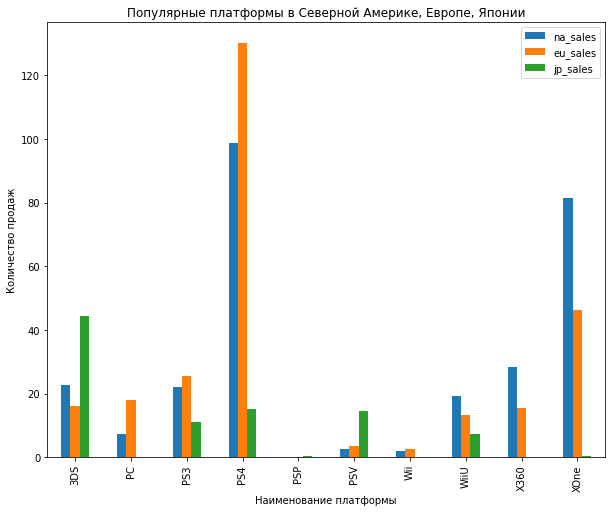

In [73]:
data_to_plot = pd.DataFrame(data=[na_popular_platform,eu_popular_platform, jp_popular_platform]).T
data_to_plot.plot(kind='bar',figsize=(10,8))
plt.title('Популярные платформы в Северной Америке, Европе, Японии')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество продаж');

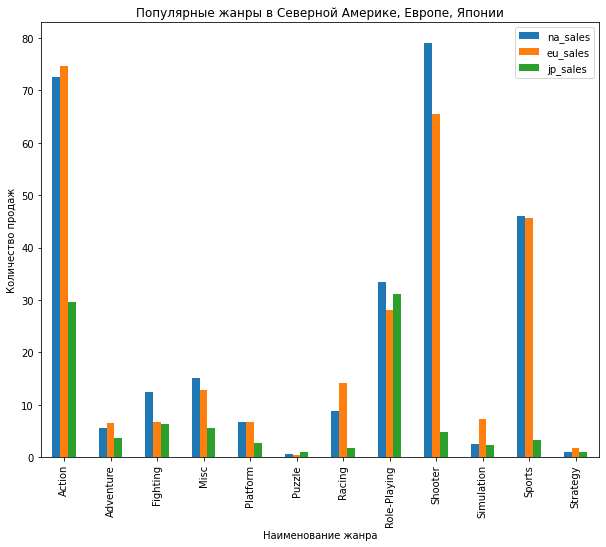

In [74]:
data_to_plot = pd.DataFrame(data=[na_popular_genre,eu_popular_genre, jp_popular_genre]).T
data_to_plot.plot(kind='bar',figsize=(10,8))
plt.title('Популярные жанры в Северной Америке, Европе, Японии')
plt.xlabel('Наименование жанра')
plt.ylabel('Количество продаж');

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Весь раздел перепроверим по актуальному периоду и визуализируем)

<div class="alert alert-info">
<b>Перепроверила и визуализировала данные</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Исправлено) 

## **Проверка гипотез**

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые (т.к. альтернативная гипотеза - это предположение, принимаемое в случае отклонения нулевой гипотезы)

Удалим строки с NaN:

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сфомрулированы верно

In [75]:
xone_without_nan = period_2014.loc[period_2014['platform']=='XOne'].user_score.dropna().values
pc_without_nan = period_2014.loc[period_2014['platform']=='PC'].user_score.dropna().values

Посчитаем средний пользовательский рейтинг для Xbox One:

In [76]:
xone_without_nan.mean()

6.594545454545456

Посчитаем средний пользовательский рейтинг для PC:

In [77]:
pc_without_nan.mean()

6.298360655737705

Проверка дисперсии выборок:

In [78]:
print('Дисперсия для Xbox One:', np.var(period_2014[period_2014['platform']=='XOne']['user_score']))
print('Дисперсия для PC:', np.var(period_2014[period_2014['platform']=='PC']['user_score']))


Дисперсия для Xbox One: 1.879546005509642
Дисперсия для PC: 2.8773743617307175


Дисперсии отличаются, у параметра equal_var примем значение False.

У нас гипотеза о равенстве средних двух генеральных совокупностей, следовательно для проверки гипотезы используем метод ttest_ind:

In [79]:
#для наиболее точного результата примем alpha 0,01
alpha = 0.01

results = st.ttest_ind(xone_without_nan, pc_without_nan, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


<font color='blue'>  **Вывод:** У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются </font>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Согласен, но перепроверим по актулаьному периоду) В статистике гипотезы невозможно подтвердить, поэтому вывод должен звучать так: У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются

<div class="alert alert-info">
<b>Данные по актуальному периоду переделаны, вывод переформулирован</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Топ
    

**Средние пользовательские рейтинги жанров Action и Sports разные**

- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные одинаковые;
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза по умолчанию говорит о каком-либо равенстве, следовательно в нулевую гипотезу закладывается равенство условий.
    
Удалим строки с NaN:

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулированы верно

In [80]:
action_without_nan = period_2014.loc[period_2014['genre']=='Action'].user_score.dropna().values
sports_without_nan = period_2014.loc[period_2014['genre']=='Sports'].user_score.dropna().values

Посчитаем средний пользовательский рейтинг для жанра Action:

In [81]:
action_without_nan.mean()

6.760606060606061

Посчитаем средний пользовательский рейтинг для Action:

In [82]:
sports_without_nan.mean()

5.2251968503937

Проверка дисперсии выборок:

In [83]:
print('Дисперсия для Action:', np.var(period_2014[period_2014['genre']=='Action']['user_score']))
print('Дисперсия для Sports:', np.var(period_2014[period_2014['genre']=='Sports']['user_score']))


Дисперсия для Action: 1.89208448117539
Дисперсия для Sports: 3.419837559675119


Дисперсии отличаются, у параметра equal_var примем значение False.

У нас гипотеза о равенстве средних двух генеральных совокупностей, следовательно для проверки гипотезы используем метод ttest_ind:

In [84]:
#для наиболее точного результата примем alpha 0,01
alpha = 0.01

results = st.ttest_ind(action_without_nan, sports_without_nan, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


<font color='blue'>  **Вывод:** У нас нет оснований утверждать, что средние пользовательские рейтинги жанров Action и Sports одинаковые </font>


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Переделаем вывод по мотиву комментария выше?)

<div class="alert alert-info">
<b>Исправила</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Хорошо) 

## **Общий вывод**

В ходе анализа данных были сделаны следующие выводы:

- к 2008 году виден рост выпуска игр и резкий спад к 2016 году;
- наибольшие суммарные продажи имеют следующие платформы:'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS';
- по всем платформам видны резкие скачки на начальных этапах продаж, затем резкое падение после выхода новых платформ;
- популярные игровые платформы в среднем существуют по 10 лет. Пик популярности наступает примерно через 5 лет после выхода приставки;
- к потенциально прибыльным платформам за актуальный период (с 2014 года)  можно отнести: PS4, XOne. Графики показывают отрицательную тенденцию на рынке;
- оценки критиков имеют влияние на продажи. Чем больше оценка критиков, тем больше продажи. Оценки пользователей слабо влияют на продажи;
- портрет пользователя Японии отличается от портретов Северной Америки и Европы. Это связано с тем, что азиатская культура и ментальтитет разнится с культурой и менталитетом западных стран;
- наименее популярны игры с рейтингом «Для всех от 10 лет и старше». Это связано с тем, что дети младшего возраста практически не пользуются игровыми консолями;
- у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются;
- у нас нет оснований утверждать, что средние пользовательские рейтинги жанров Action и Sports одинаковые.



<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Исправим замечания и дорабоатем вывод) 

<div class="alert alert-info">
<b>Выводы исправила</b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Вывод отражает проделанную работу!

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
Елена, спасибо за  проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большая молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    3. На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. Неверно определен актулаьный период, что привело к ошибкам в последубщих разделах 
    
    
**Удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v2**:
Елена, ошибки исправлены, проект принят, поздравляю тебя! Успешной учебы и еще увидимся в Практикуме!